In [1]:
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("MiApp").getOrCreate()

# Ahora puedes acceder a 'sc' y otros métodos de Spark
sc = spark.sparkContext

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/14 03:06:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/14 03:06:32 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/14 03:06:32 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/08/14 03:06:32 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [2]:
#Obtenemos SparkContext que haya cargado correctamente
sc

<SparkContext master=local[*] appName=MiApp>

In [3]:
#leer fichero
txt = 'about_spark.txt'
open(txt, 'r').read()[:500]

'Apache Spark\n-------------\nApache Spark is a cluster computing platform designed to be fast and general purpose.\nOn the speed side, Spark extends the popular MapReduce model to efficiently support more types of computations, including interactive queries and stream processing. Speed is important in processing large datasets, as it means the difference between exploring data interactively and waiting minutes or hours. One of the main features Spark offers for speed is the ability to run computati'

In [4]:
#obtener lineas del fichero
lines = sc.textFile(txt).cache()
lines

about_spark.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [5]:
#obtener número de líneas
lines.count()

6

In [7]:
#obener palabras a través del separador cadena vacía
lines.flatMap(lambda x: x.split(' ')).count()

206

In [8]:
#por cada palabra encontrada se le asigna un 1
words_count = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1)).take(20)
words_count

[('Apache', 1),
 ('Spark', 1),
 ('-------------', 1),
 ('Apache', 1),
 ('Spark', 1),
 ('is', 1),
 ('a', 1),
 ('cluster', 1),
 ('computing', 1),
 ('platform', 1),
 ('designed', 1),
 ('to', 1),
 ('be', 1),
 ('fast', 1),
 ('and', 1),
 ('general', 1),
 ('purpose.', 1),
 ('On', 1),
 ('the', 1),
 ('speed', 1)]

### Palabras más frecuentes

In [9]:
from operator import add
words_count = lines.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1))
#aplicar operación reducebykey que para cada palabra sumará los 1 encontrados
#ordenación de forma ascendente
count_total = words_count.reduceByKey(add).sortBy(lambda x: x[1], ascending=False)
count_total.collect()

[('the', 9),
 ('Spark', 8),
 ('and', 8),
 ('is', 7),
 ('in', 6),
 ('to', 6),
 ('of', 4),
 ('designed', 3),
 ('including', 3),
 ('it', 3),
 ('data', 3),
 ('Apache', 2),
 ('speed', 2),
 ('MapReduce', 2),
 ('more', 2),
 ('run', 2),
 ('a', 2),
 ('be', 2),
 ('On', 2),
 ('side,', 2),
 ('interactive', 2),
 ('processing', 2),
 ('for', 2),
 ('also', 2),
 ('workloads', 2),
 ('separate', 2),
 ('In', 2),
 ('tools.', 2),
 ('Hadoop', 2),
 ('-------------', 1),
 ('platform', 1),
 ('purpose.', 1),
 ('extends', 1),
 ('model', 1),
 ('support', 1),
 ('computations,', 1),
 ('Speed', 1),
 ('large', 1),
 ('as', 1),
 ('means', 1),
 ('exploring', 1),
 ('interactively', 1),
 ('waiting', 1),
 ('minutes', 1),
 ('hours.', 1),
 ('One', 1),
 ('offers', 1),
 ('but', 1),
 ('than', 1),
 ('generality', 1),
 ('systems,', 1),
 ('applications,', 1),
 ('iterative', 1),
 ('queries,', 1),
 ('these', 1),
 ('engine,', 1),
 ('inexpensive', 1),
 ('combine', 1),
 ('different', 1),
 ('types,', 1),
 ('production', 1),
 ('pipelines.

In [11]:
import re

data = sc.textFile("about_spark.txt")
palabras = (data
            .flatMap(lambda linea: re.compile("\W").split(linea))
            .filter(lambda palabra: palabra != '')
            .map(lambda palabra: palabra.lower()))

histograma = (palabras
              .map(lambda palabra : (palabra,1))
              .reduceByKey(lambda x,y: x+y))

masFrecuentes = (histograma
                 .sortBy(lambda v: -v[1]).take(15))

for p in masFrecuentes:
    print (p[0] + ": %d" % p[1])

in: 9
the: 9
spark: 8
and: 8
is: 7
to: 6
of: 4
it: 4
data: 4
designed: 3
speed: 3
on: 3
including: 3
processing: 3
more: 2


### Crear histograma

In [12]:
# contar lineas del fichero
print('numbero de lineas: %s' % data.count())

# contar caracteres
chars = data.map(lambda s: len(s)).reduce(add)
print('numero de caracteres: %s' % chars)

# obtener palabras
palabras =data.flatMap(lambda line: re.split('\W+', line.lower().strip()))

# palabras que tegan más de 3 caracteres
palabras = palabras.filter(lambda x: len(x) > 3)

# establecer contador de cada palabra
palabras = palabras.map(lambda w: (w,1))

# fase reduce 
palabras = palabras.reduceByKey(add)

# crear tupla (contador, palabra) ordenados de forma descendente
palabras = palabras.map(lambda x: (x[1], x[0])).sortByKey(False)

# obtener top de 20 palabras ordenadas por frecuencia
palabras.take(20)

numbero de lineas: 6
numero de caracteres: 1374


[(8, 'spark'),
 (4, 'data'),
 (3, 'designed'),
 (3, 'speed'),
 (3, 'including'),
 (3, 'processing'),
 (2, 'more'),
 (2, 'tools'),
 (2, 'hadoop'),
 (2, 'apache'),
 (2, 'side'),
 (2, 'mapreduce'),
 (2, 'types'),
 (2, 'computations'),
 (2, 'interactive'),
 (2, 'queries'),
 (2, 'also'),
 (2, 'applications'),
 (2, 'workloads'),
 (2, 'separate')]

In [15]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 92.1 kB/s eta 0:00:0000:0100:03m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 139.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 87.7 kB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 140.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 110.8 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 613.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [16]:
# crear histograma de palabras más frecuentes

#% matplotlib inline
import matplotlib.pyplot as plt

def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count,color = 'grey')
    plt.yticks(range(len(count)), word)

# Change order of tuple (word, count) from (count, word) 
palabras = palabras.map(lambda x:(x[1], x[0]))
palabras.take(25)

# display histogram
histogram(palabras.take(25))

# words in one summarised statement
palabras = sc.textFile('about_spark.txt').flatMap(lambda line: re.split('\W+', line.lower().strip())).filter(lambda x: len(x) > 3).map(lambda w: (w,1)).reduceByKey(add).map(lambda x: (x[1], x[0])).sortByKey(False)
palabras.take(20)

TypeError: object of type 'map' has no len()

[(8, 'spark'), (4, 'data'), (3, 'designed'), (3, 'speed'), (3, 'including'), (3, 'processing'), (2, 'more'), (2, 'tools'), (2, 'hadoop'), (2, 'apache'), (2, 'side'), (2, 'mapreduce'), (2, 'types'), (2, 'computations'), (2, 'interactive'), (2, 'queries'), (2, 'also'), (2, 'applications'), (2, 'workloads'), (2, 'separate')]


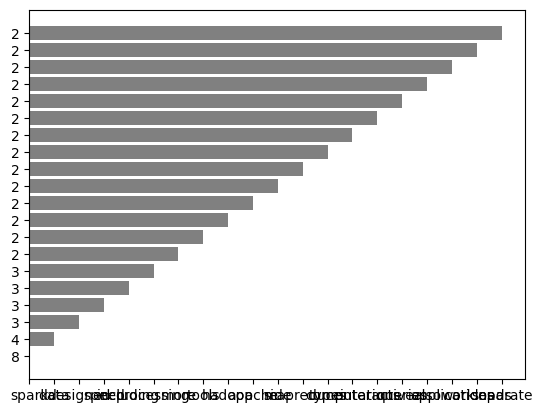

In [17]:
import re
import matplotlib.pyplot as plt
from operator import add

# Define the histogram function
def histogram(words):
    count = list(map(lambda x: x[1], words))  # Convert map to list
    word = list(map(lambda x: x[0], words))   # Convert map to list
    plt.barh(range(len(count)), count, color='grey')
    plt.yticks(range(len(count)), word)

# Load and process the text file
palabras = sc.textFile('about_spark.txt') \
             .flatMap(lambda line: re.split('\W+', line.lower().strip())) \
             .filter(lambda x: len(x) > 3) \
             .map(lambda w: (w, 1)) \
             .reduceByKey(add) \
             .map(lambda x: (x[1], x[0])) \
             .sortByKey(False)

# Display the top 20 most frequent words
top_words = palabras.take(20)
print(top_words)

# Create and display the histogram
histogram(top_words)
